# Fundamentals of machine learning

## Generalization: The goal of machine learning

## Import the library

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.6211 - accuracy: 0.8100 - val_loss: 0.2587 - val_accuracy: 0.9240
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2592 - accuracy: 0.9211 - val_loss: 0.2024 - val_accuracy: 0.9394
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1697 - accuracy: 0.9479 - val_loss: 0.1578 - val_accuracy: 0.9522
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1211 - accuracy: 0.9623 - val_loss: 0.1281 - val_accuracy: 0.9629
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0894 - accuracy: 0.9725 - val_loss: 0.1361 - val_accuracy: 0.9598
Epoch 6/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0656 - accuracy: 0.9793 - val_loss: 0.1162 - val_accuracy: 0.9657
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.1198 - val_accuracy: 0.9660

**Plotting a validation accuracy comparison**

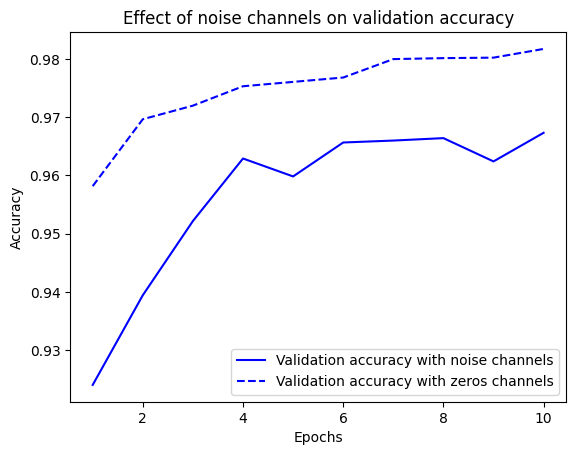

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 11ms/step - loss: 2.3142 - accuracy: 0.1037 - val_loss: 2.3058 - val_accuracy: 0.1032
Epoch 2/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2977 - accuracy: 0.1208 - val_loss: 2.3110 - val_accuracy: 0.1028
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2898 - accuracy: 0.1299 - val_loss: 2.3157 - val_accuracy: 0.1017
Epoch 4/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2772 - accuracy: 0.1411 - val_loss: 2.3292 - val_accuracy: 0.1053
Epoch 5/100
375/375 [==============================] - 4s 9ms/step - loss: 2.2607 - accuracy: 0.1546 - val_loss: 2.3361 - val_accuracy: 0.1049
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2410 - accuracy: 0.1672 - val_loss: 2.3499 - val_accuracy: 0.1012
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2182 - accuracy: 0.1831 - val_loss: 2.3586 - val_accuracy: 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 741.9896 - accuracy: 0.3092 - val_loss: 2.0889 - val_accuracy: 0.2529
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 2.7534 - accuracy: 0.1962 - val_loss: 2.1473 - val_accuracy: 0.1825
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 2.5529 - accuracy: 0.1839 - val_loss: 2.5432 - val_accuracy: 0.2375
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 2.6152 - accuracy: 0.2191 - val_loss: 2.2130 - val_accuracy: 0.2309
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.6282 - accuracy: 0.1895 - val_loss: 2.3091 - val_accuracy: 0.1863
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 2.3471 - accuracy: 0.1896 - val_loss: 2.1325 - val_accuracy: 0.2042
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 2.6631 - accuracy: 0.2186 - val_loss: 2.2637 - val_accuracy: 0.2242

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3570 - accuracy: 0.9114 - val_loss: 0.2042 - val_accuracy: 0.9437
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1276 - accuracy: 0.9643 - val_loss: 0.1215 - val_accuracy: 0.9688
Epoch 3/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0991 - accuracy: 0.9736 - val_loss: 0.1391 - val_accuracy: 0.9706
Epoch 4/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0789 - accuracy: 0.9794 - val_loss: 0.1556 - val_accuracy: 0.9694
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0680 - accuracy: 0.9831 - val_loss: 0.1850 - val_accuracy: 0.9688
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0584 - accuracy: 0.9859 - val_loss: 0.1917 - val_accuracy: 0.9679
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0548 - accuracy: 0.9872 - val_loss: 0.1942 - val_accuracy: 0.9713
Epo

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6644 - accuracy: 0.8368 - val_loss: 0.3623 - val_accuracy: 0.9018
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3543 - accuracy: 0.9026 - val_loss: 0.3084 - val_accuracy: 0.9152
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3185 - accuracy: 0.9104 - val_loss: 0.2923 - val_accuracy: 0.9187
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.9155 - val_loss: 0.2834 - val_accuracy: 0.9207
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.9186 - val_loss: 0.2781 - val_accuracy: 0.9241
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2860 - accuracy: 0.9196 - val_loss: 0.2729 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.9211 - val_loss: 0.2718 - val_accuracy: 0.9256
Epoch 

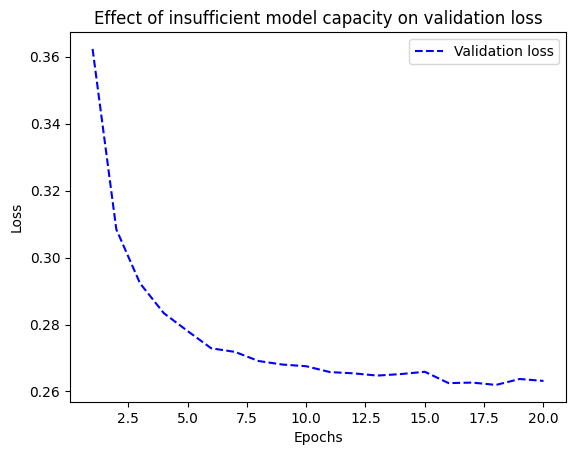

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3679 - accuracy: 0.8968 - val_loss: 0.1911 - val_accuracy: 0.9438
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1627 - accuracy: 0.9521 - val_loss: 0.1510 - val_accuracy: 0.9557
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1149 - accuracy: 0.9652 - val_loss: 0.1179 - val_accuracy: 0.9653
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0882 - accuracy: 0.9725 - val_loss: 0.1085 - val_accuracy: 0.9673
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0703 - accuracy: 0.9783 - val_loss: 0.0902 - val_accuracy: 0.9729
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0576 - accuracy: 0.9830 - val_loss: 0.1006 - val_accuracy: 0.9704
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0899 - val_accuracy: 0.9742
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5112 - accuracy: 0.7757 - val_loss: 0.3806 - val_accuracy: 0.8713
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3111 - accuracy: 0.8952 - val_loss: 0.3459 - val_accuracy: 0.8588
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2324 - accuracy: 0.9207 - val_loss: 0.2815 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1912 - accuracy: 0.9347 - val_loss: 0.2751 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1596 - accuracy: 0.9455 - val_loss: 0.2948 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1343 - accuracy: 0.9561 - val_loss: 0.2920 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1129 - accuracy: 0.9644 - val_loss: 0.3177 - val_accuracy: 0.8805
Epoch 8/20
30

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.6187 - accuracy: 0.6311 - val_loss: 0.5664 - val_accuracy: 0.6993
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5321 - accuracy: 0.7799 - val_loss: 0.5228 - val_accuracy: 0.7701
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4862 - accuracy: 0.8471 - val_loss: 0.4948 - val_accuracy: 0.8231
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4534 - accuracy: 0.8832 - val_loss: 0.4735 - val_accuracy: 0.8617
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4252 - accuracy: 0.9083 - val_loss: 0.4621 - val_accuracy: 0.8526
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3995 - accuracy: 0.9242 - val_loss: 0.4430 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3764 - accuracy: 0.9379 - val_loss: 0.4310 - val_accuracy: 0.8765
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 143ms/step - loss: 0.5765 - accuracy: 0.7089 - val_loss: 0.4068 - val_accuracy: 0.8232
Epoch 2/20
30/30 [==============================] - 4s 123ms/step - loss: 0.3303 - accuracy: 0.8620 - val_loss: 0.3141 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 4s 143ms/step - loss: 0.2289 - accuracy: 0.9096 - val_loss: 0.3821 - val_accuracy: 0.8287
Epoch 4/20
30/30 [==============================] - 5s 166ms/step - loss: 0.1836 - accuracy: 0.9280 - val_loss: 0.2891 - val_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 4s 137ms/step - loss: 0.1353 - accuracy: 0.9486 - val_loss: 0.2902 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 4s 126ms/step - loss: 0.0989 - accuracy: 0.9687 - val_loss: 0.3277 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 4s 131ms/step - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.3537 - val_accuracy: 0.8859
Epoch 

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [3]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

NameError: name 'train_data' is not defined

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6340 - accuracy: 0.6359 - val_loss: 0.5270 - val_accuracy: 0.8255
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.5141 - accuracy: 0.7668 - val_loss: 0.4140 - val_accuracy: 0.8680
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4385 - accuracy: 0.8180 - val_loss: 0.3569 - val_accuracy: 0.8706
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3688 - accuracy: 0.8553 - val_loss: 0.3130 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3199 - accuracy: 0.8852 - val_loss: 0.2873 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2752 - accuracy: 0.9033 - val_loss: 0.2745 - val_accuracy: 0.8922
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2462 - accuracy: 0.9179 - val_loss: 0.2759 - val_accuracy: 0.8926
Epoch 8/20
30

## Summary